In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Garuda"
plt.rcParams["font.size"] = 11

In [2]:
velocities = ["100", "10", "2", "0p5", "0p1", "0p01"]

data = {}

for velocity in velocities:
    data[velocity] = np.genfromtxt(f"data/velocity-range/{velocity}.txt")

In [3]:
L = 300
t_f = 3000
bins = 300

time_steps = np.arange(t_f)

# Dictionaries to store histograms and edges
histograms = {}
xedges = {}
yedges = {}

for velocity in velocities:
    data_flattened = data[velocity].flatten()
    hist, xedge, yedge = np.histogram2d(data_flattened, np.repeat(time_steps, data[velocity].shape[1]), bins=[bins, t_f], range=[[0, L], [0, t_f]])
    histograms[velocity] = hist
    xedges[velocity] = xedge
    yedges[velocity] = yedge

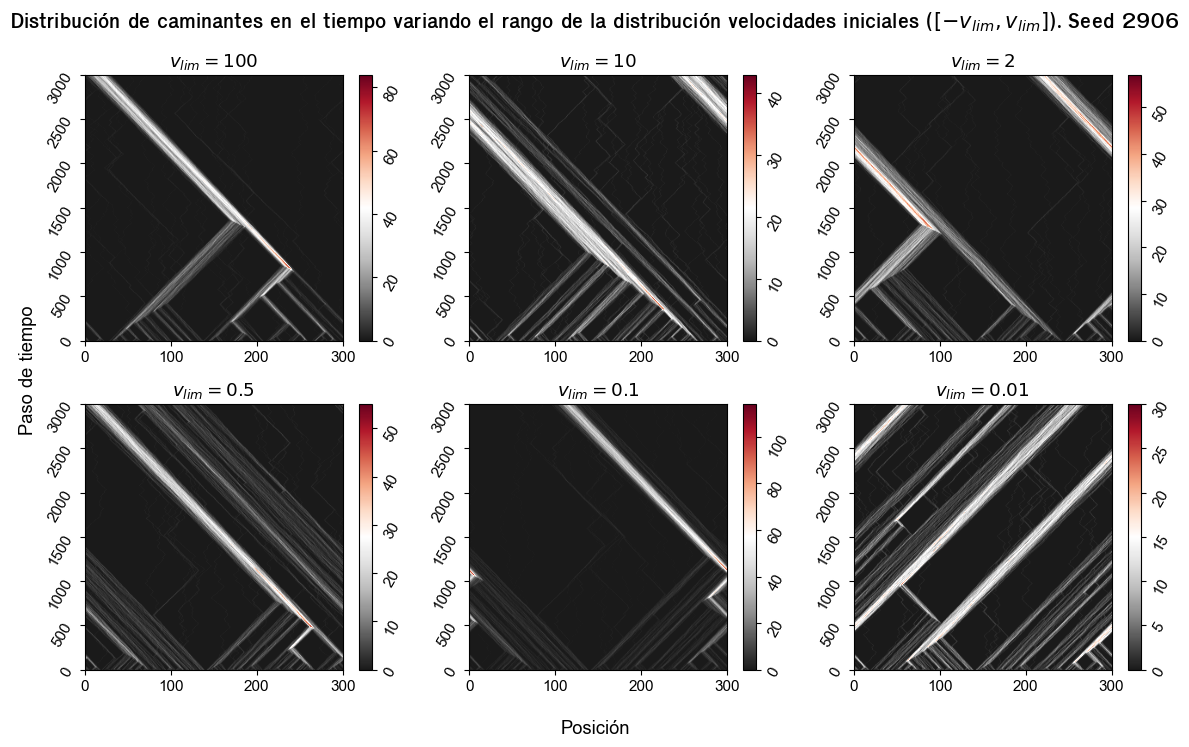

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 7.5))
fig.suptitle("Distribución de caminantes en el tiempo variando el rango de la distribución velocidades iniciales ($[-v_{lim},v_{lim}]$). Seed 2906", fontweight="bold", fontsize=15)
fig.supxlabel("Posición")
fig.supylabel("Paso de tiempo")

for a in ax.flat:
    a.tick_params(axis='y', which='major', rotation=60)

titles = ["$v_{lim}=100$", "$v_{lim}=10$", "$v_{lim}=2$", "$v_{lim}=0.5$", "$v_{lim}=0.1$", "$v_{lim}=0.01$"]

for a, title, velocity in zip(ax.flat, titles, velocities):
    a.set_title(title)
    im = a.imshow(histograms[velocity].T, origin='lower', aspect='auto', extent=[0, L, 0, t_f], cmap='RdGy_r')
    # im = a.imshow(histogram.T, origin='lower', aspect='auto', extent=[0, L, 0, t_f], cmap='pink')

    cbar = fig.colorbar(im, ax=a)
    cbar.ax.tick_params(rotation=60)

fig.tight_layout()
fig.savefig("figs/velocity-range.pdf")